In [1]:
"""\
# Copyright (C) 2023 Jesús Bautista Villar <jesbauti20@gmail.com>
"""

import numpy as np

# Graphic tools
import matplotlib.pyplot as plt
import matplotlib

font_params = {'size' : 14}
matplotlib.rc('font', **font_params)

# Source Seeking Tools
from simulations.source_seeking.toolbox import M_rot
from simulations.source_seeking.sigma_common import sigma
from simulations.source_seeking.sigma_funcs import sigma_gauss

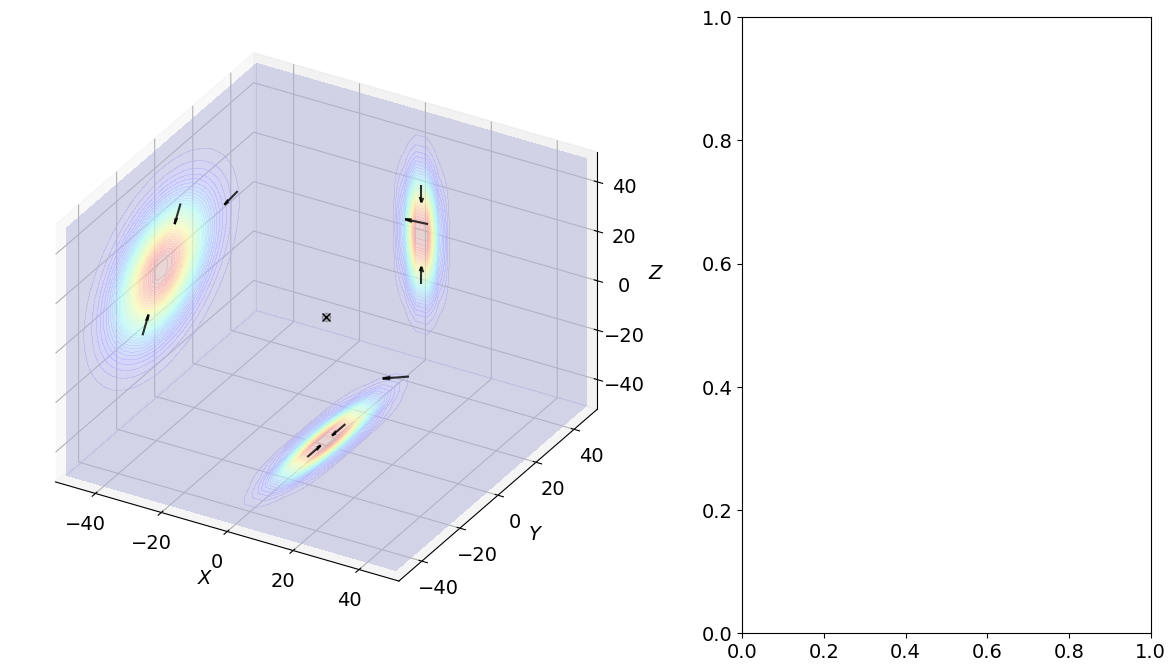

In [13]:
# ----------------------------------------------------------------------
# Testing a non-convex field with one source (sigma_fract)
# ----------------------------------------------------------------------

psi = 45 * np.pi / 180

# Generate the scalar field
R2 = M_rot(psi)

sigma_func = sigma_gauss(x0=[0,0,0], max_intensity=100, dev=[3,15,15])
sigma_test = sigma(sigma_func)

# Generate the plot
fig  = plt.figure(figsize=(15,8))
grid = plt.GridSpec(3, 5, hspace=0, wspace=0.6)

ax1 = fig.add_subplot(grid[:, 0:3], projection='3d', computed_zorder=False)
ax2 = fig.add_subplot(grid[:, 3:5])

# Draw the scalar field
sigma_test.draw_3D(fig=fig, ax=ax1, lim=50, contour_levels=40)

# Draw multiple gradients
sigma_test.draw_grad_3D([0, 10, 20], ax1, length=10, lim=50)
sigma_test.draw_grad_3D([2, 40, 5], ax1, length=10)
sigma_test.draw_grad_3D([0,-10, -20], ax1, length=10)

# PLOT!
plt.show()